In [37]:
import numpy as np
import pandas as pd

In [38]:
data = pd.read_excel("/Users/sakshamwane/Desktop/LetsUpgrade-AI-ML/Day 21/Datasets/Bank_Personal_Loan_Modelling (2).xlsx", sheet_name=1)

In [39]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Dropping Irrelevant Columns

In [47]:
data = data.drop(['ID', 'ZIP Code'], axis=1)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


# Checking Null Values

In [49]:
data.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [50]:
data.duplicated().sum()

13

In [51]:
data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# Detecting Outliers Using Boxplot

In [52]:
import matplotlib.pyplot as plt

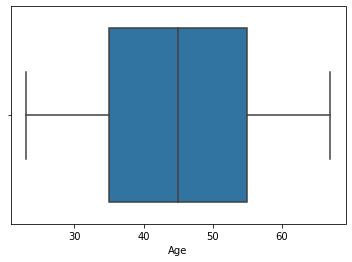

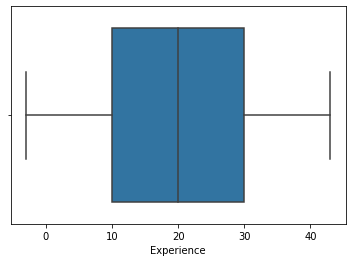

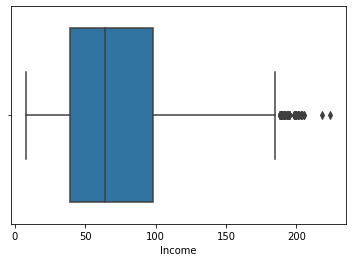

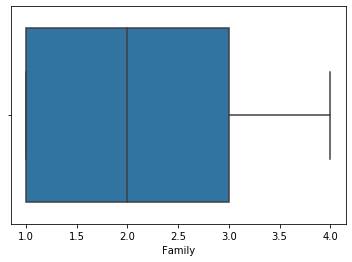

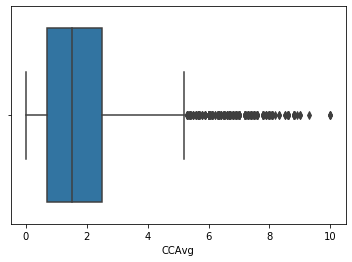

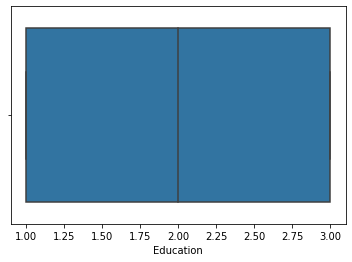

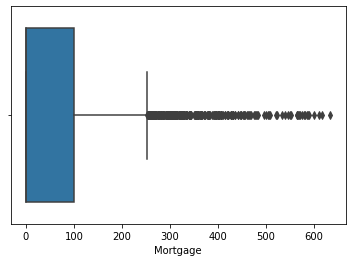

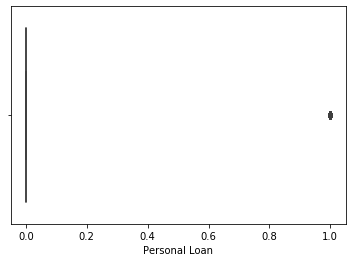

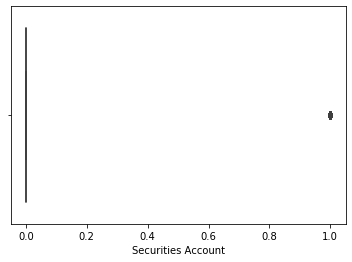

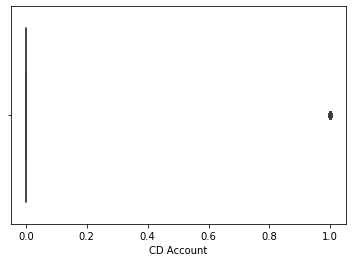

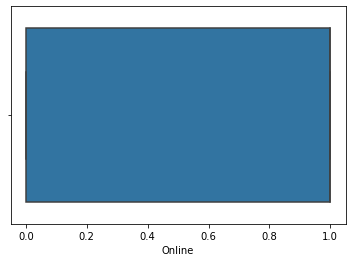

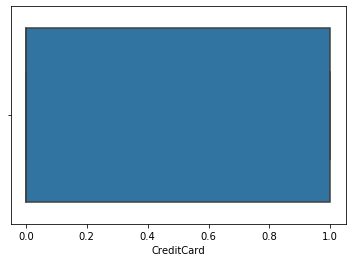

In [55]:
col = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']
for i in col:
    sns.boxplot(data[i])
    plt.show()

# Inference from boxplot:
 - Age and experince have no outliers
 - CD account, Securities account, Personal Loan have a few outliers
 - Income has moderate outliers
 - Mortgage and CCAvg have many outliers

# Checking the Distribution of Continious Variable By Plotting Histogram

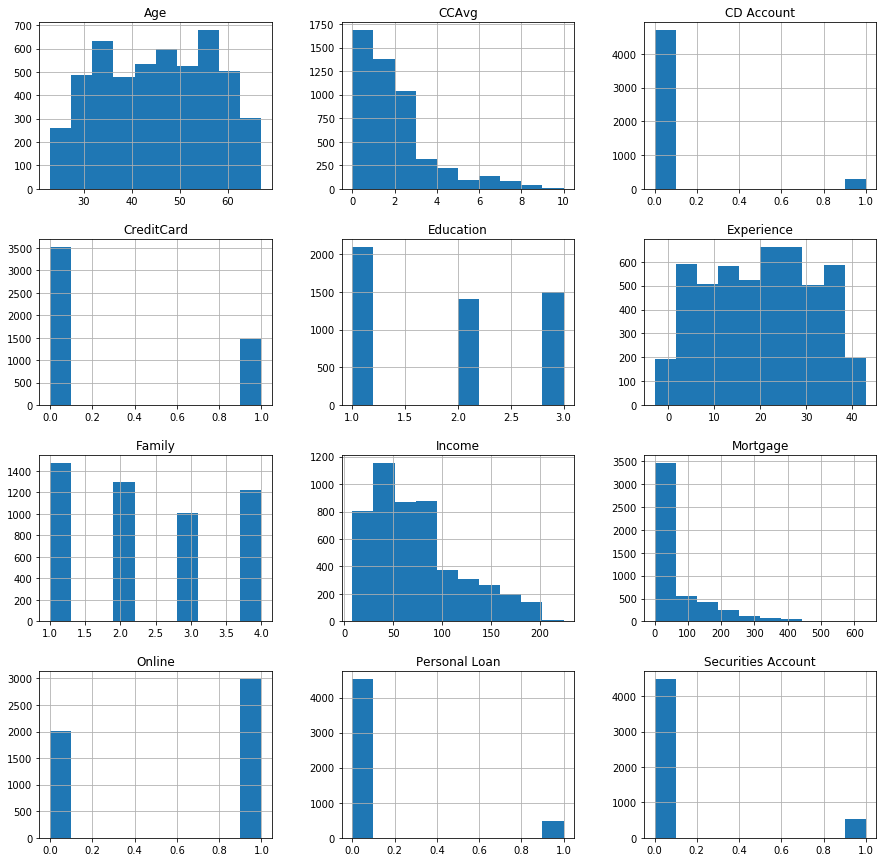

In [57]:
data.hist(figsize=(15,15))
plt.show()

# Inference from Histogram
 - Target Variable Personal Loan is Binary Categorial 

# Splitting the Data

In [58]:
Y = data["Personal Loan"]
X = data[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']]

# Adding Constant And Applying Logistic Regression because Target Variable is Binary Categorical

In [62]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
Logistic = sm.Logit(Y, X1)
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


In [63]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Thu, 17 Sep 2020   Pseudo R-squ.:                  0.5938
Time:                        18:41:49   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""